In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly.express as px 

#ml stuff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn import ensemble

from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error

#loading datasets 

labels = pd.read_csv('labels.csv')

In [79]:
!pip install pmdarima

# New Section

#### Getting the files to be used for modeling and basic analysis.
  1. Basic stats 


In [80]:
# 1. Basic analysis
print("Shape of labels :", labels.shape)


#2. checking nulls in the data and removing those columns
print(" \ntotal nulls in labels dataset : ", labels.isnull().sum())



Shape of labels : (507, 2)
 
total nulls in labels dataset :  timestamp    0
label        0
dtype: int64


In [81]:
labels.head()


,timestamp,label
0,1.368599e+09,49.744664
1,1.369204e+09,52.428068
2,1.369809e+09,67.154640
3,1.370414e+09,40.521581
4,1.371019e+09,63.614351


In [82]:

labels.describe()
labels['label'].min()
#

3.503322739092852

# converting timestamp to date and time format

In [83]:
from datetime import datetime

for index in range(labels.shape[0]):
    labels.loc[index,'datetime'] = datetime.fromtimestamp(labels.loc[index,'timestamp'])
labels.head()

#labels=labels[['datetime','label']]


,timestamp,label,datetime
0,1.368599e+09,49.744664,2013-05-15 06:30:00
1,1.369204e+09,52.428068,2013-05-22 06:30:00
2,1.369809e+09,67.154640,2013-05-29 06:30:00
3,1.370414e+09,40.521581,2013-06-05 06:30:00
4,1.371019e+09,63.614351,2013-06-12 06:30:00


In [84]:

print('Time period start: {}\nTime period end: {}'.format(labels.datetime.min(),labels.datetime.max()))


Time period start: 2013-05-15 06:30:00
Time period end: 2016-12-07 07:30:00


In [85]:
# data=labels.loc[:,['label']]
# data=data.set_index(labels.datetime)
# data.head()
#data.index
data_set1=labels.loc[:,['label']]
data_set1=data_set1.set_index(labels.datetime)
data_set1.head()




,label
datetime,
2013-05-15 06:30:00,49.744664
2013-05-22 06:30:00,52.428068
2013-05-29 06:30:00,67.154640
2013-06-05 06:30:00,40.521581
2013-06-12 06:30:00,63.614351


In [86]:
fig = px.line(labels, x = 'datetime',y = 'label',title = 'production year wise')
fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [87]:
data=data_set1
data_copy = data_set1

In [88]:
data['2016-03']

,label
datetime,


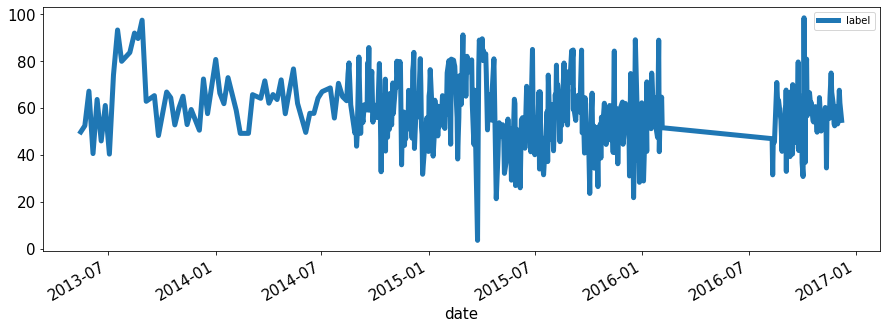

In [89]:

data.plot(figsize=(15,5), linewidth=5, fontsize=15)
plt.xlabel('date', fontsize=15);

# data.plot(figsize=(15, 6),linewidth=5, fontsize=15)
# plt.show()
#data.isnull().sum()

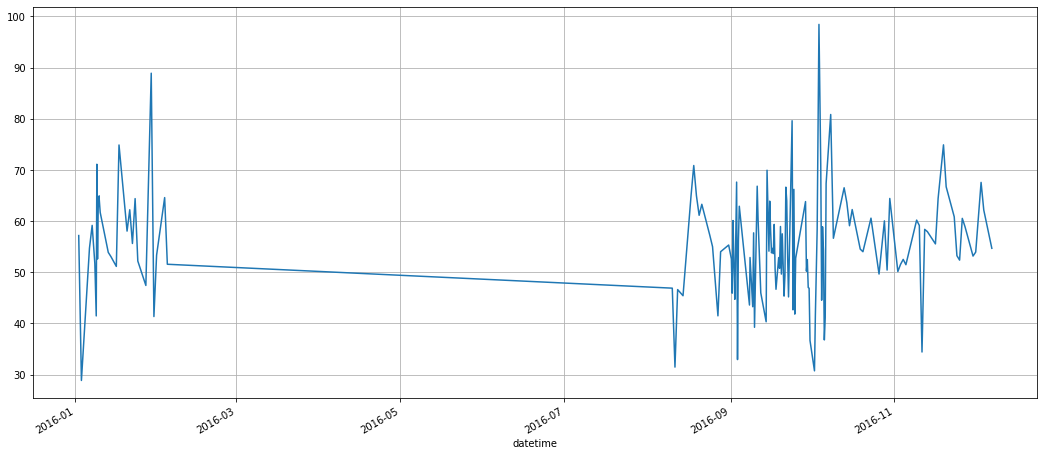

In [90]:
df_2016 = data.loc['2016']
data_2016 = df_2016['label']
data_2016.plot(grid = True)

In [91]:
data.head()

,label
datetime,
2013-05-15 06:30:00,49.744664
2013-05-22 06:30:00,52.428068
2013-05-29 06:30:00,67.154640
2013-06-05 06:30:00,40.521581
2013-06-12 06:30:00,63.614351


# Reviewing density of observations:
It shows data is normally distributed

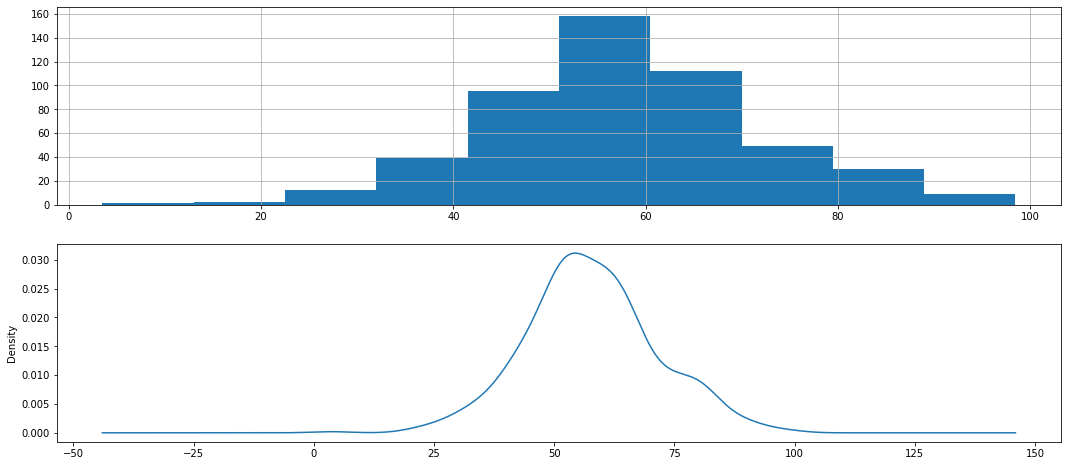

In [92]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
data.label.hist()
pyplot.subplot(212)
data.label.plot(kind='kde')
pyplot.show()

# Resampling
Resampling involves changing the frequency of time series observations.
The resample method in pandas is similar to its groupby method.


# Weekly Representation
The period of 2013 to july 2014 has low production. After july 2014, production goes increased. The graph clearly indicates there has no production from period jan 2016 to july 2016. In july 2016, there has highest production. It clearly shows there has no production in between ['2016-03-01':'2016-08-01']. decided to remove that period.

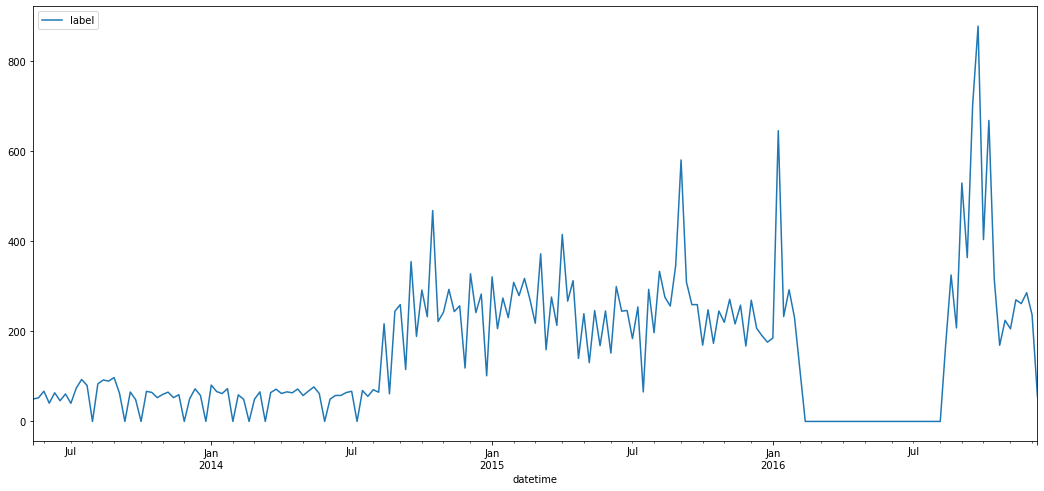

In [93]:
weekly=data.resample('W').sum()
weekly.plot()

# Monthly Analysis
The graph shows that in each year, the july month has peak production volume and in year 2016 has maximum.



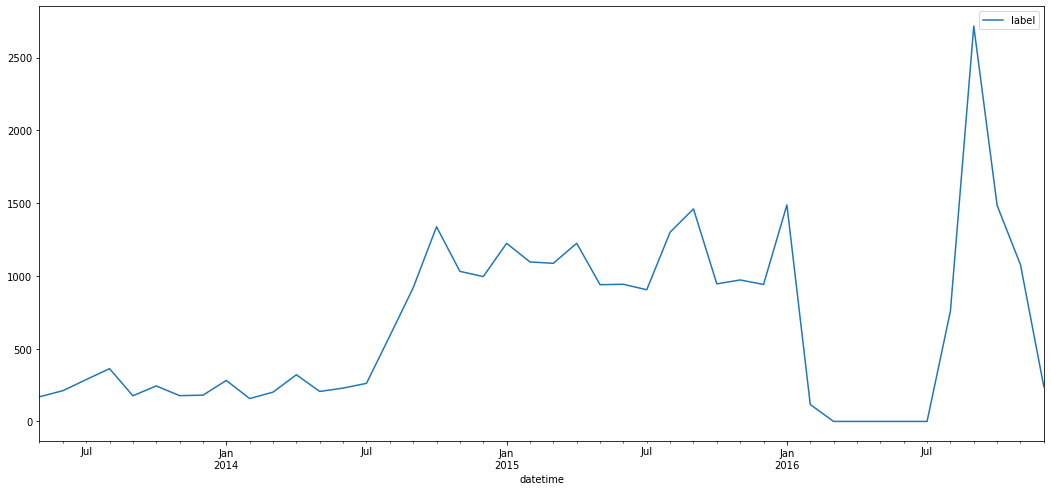

In [94]:
monthly=data.resample('M').sum()
monthly.plot()

# Yearly Analysis
In this graph, it shows the production is constatly increased from 2013 to 2015. after that it goes declined.

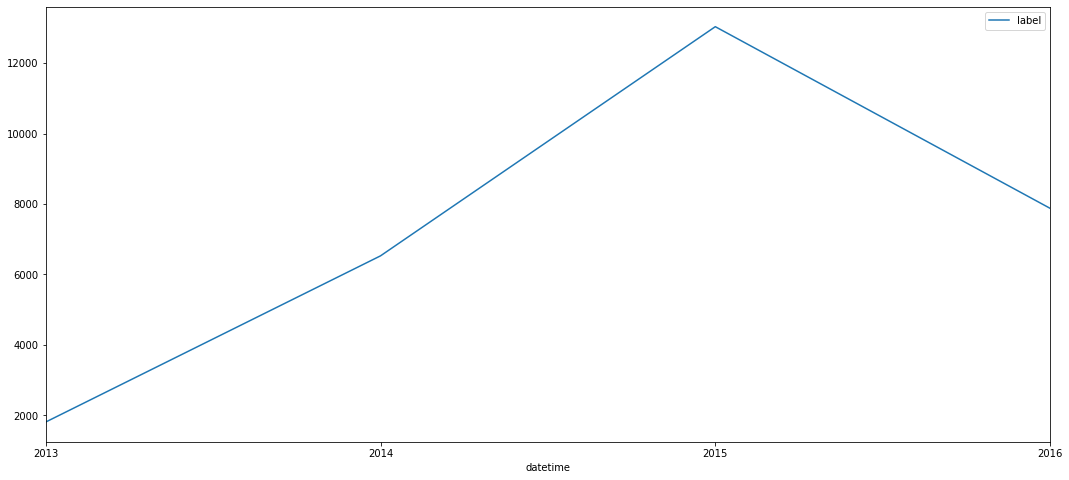

In [95]:
weekly=data.resample('Y').sum()
weekly.plot()

# Half_yearly analysis:
This graph shows more clear analysis. It shows there has steady prodction from jul13 to jul2014.
There has peak production from july 2014 to jan 2016. after that it goes to decline.
the period jan 2016 to jul 2016 is declining phase of prodction.
after that in july 2016 again goes increased.


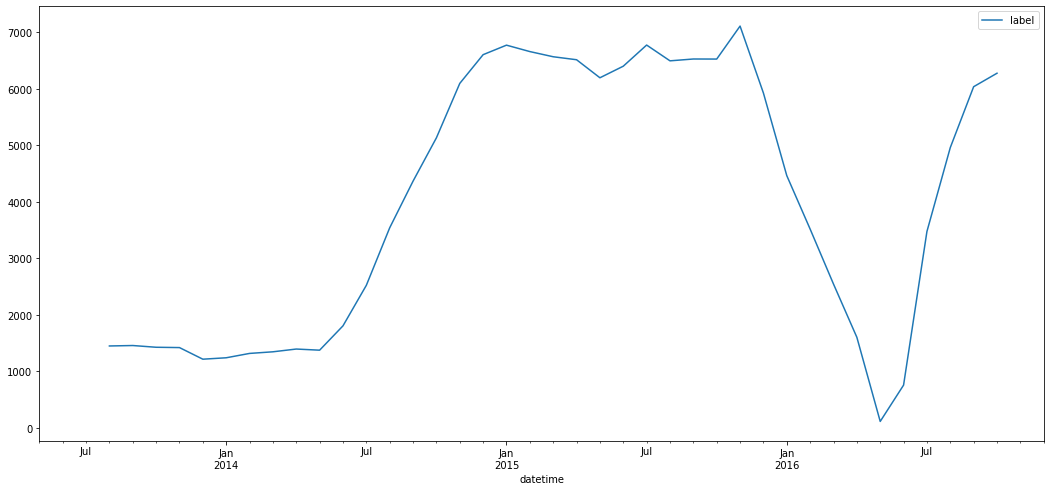

In [96]:
half_yearly=data.resample('M').sum()
half_yearly.rolling(6,center=True).sum().plot()


# Box and whisker plot
The median values for each year (center line) show steady trend.
The spread or middle 50% of the data (boxes) does appear reasonably stable.
There are outliers in year 2015 and 2016(black crosses); these may be the tops or bottoms of the seasonal cycle.
The last year, 2016, does look different from the trend in prior years


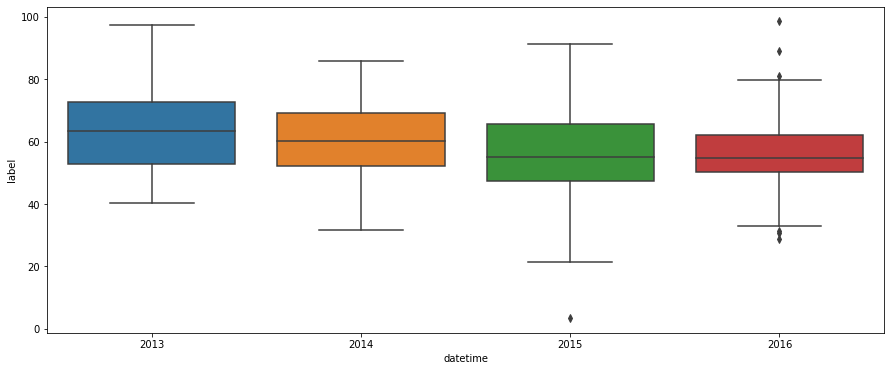

In [97]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data.label.index.year,data.label, ax=ax)

# Hourly Production:
it shows there has continous 20 hrs pruction works and after that it takes little break.

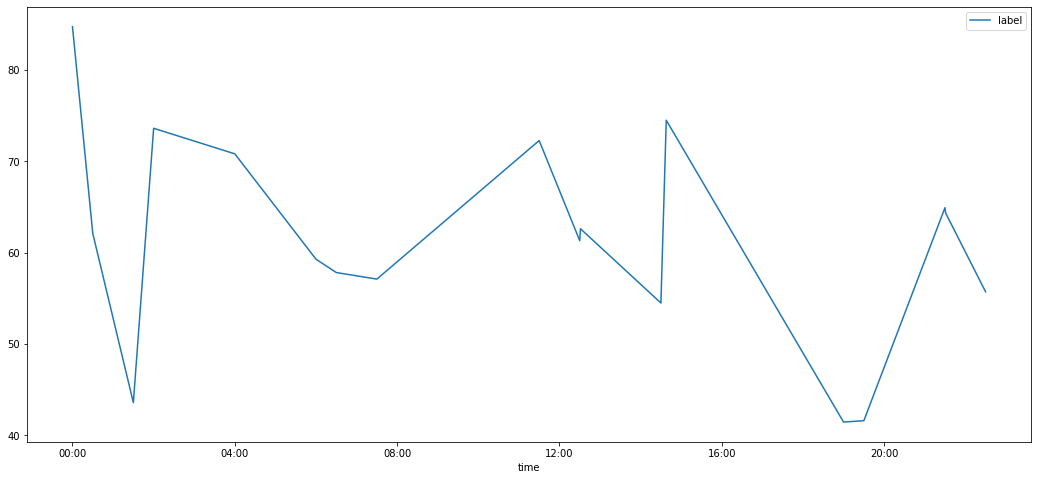

In [98]:
time_wise=data.groupby(data.index.time).mean()
hourly_ticks=4*60*60*np.arange(6)
time_wise.plot(xticks=hourly_ticks)

# Decomposing using statsmodel:

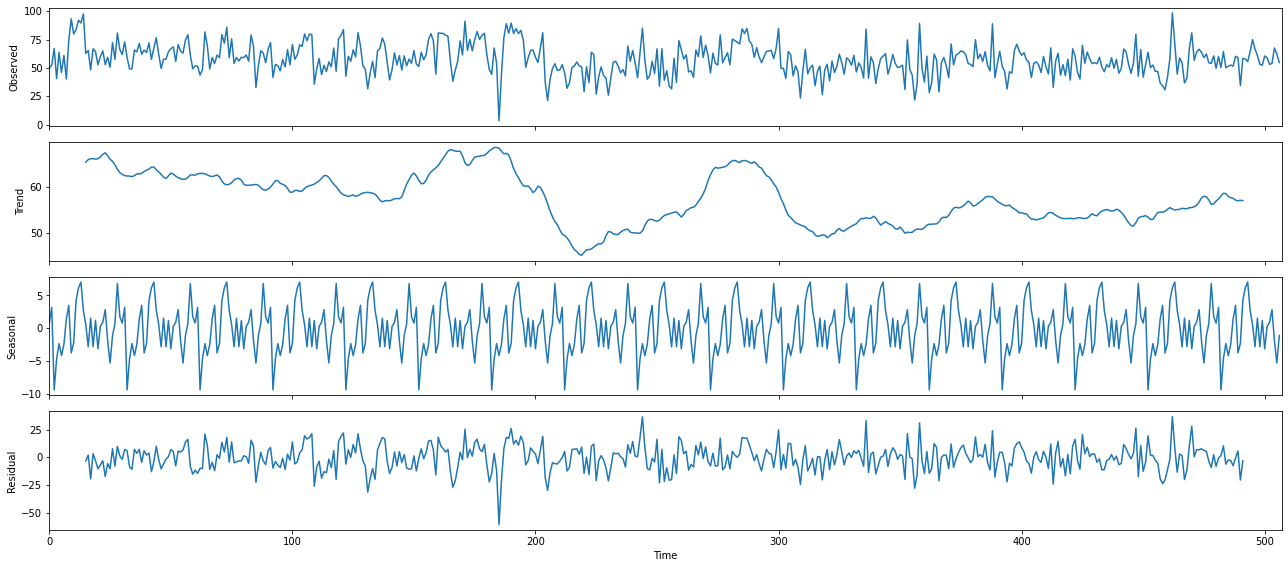

In [99]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data.label.values, freq=30,model='additive')

#decomposition = sm.tsa.seasonal_decompose(data,model='multiplicative')
fig = decomposition.plot()
plt.show()


<function matplotlib.pyplot.show>

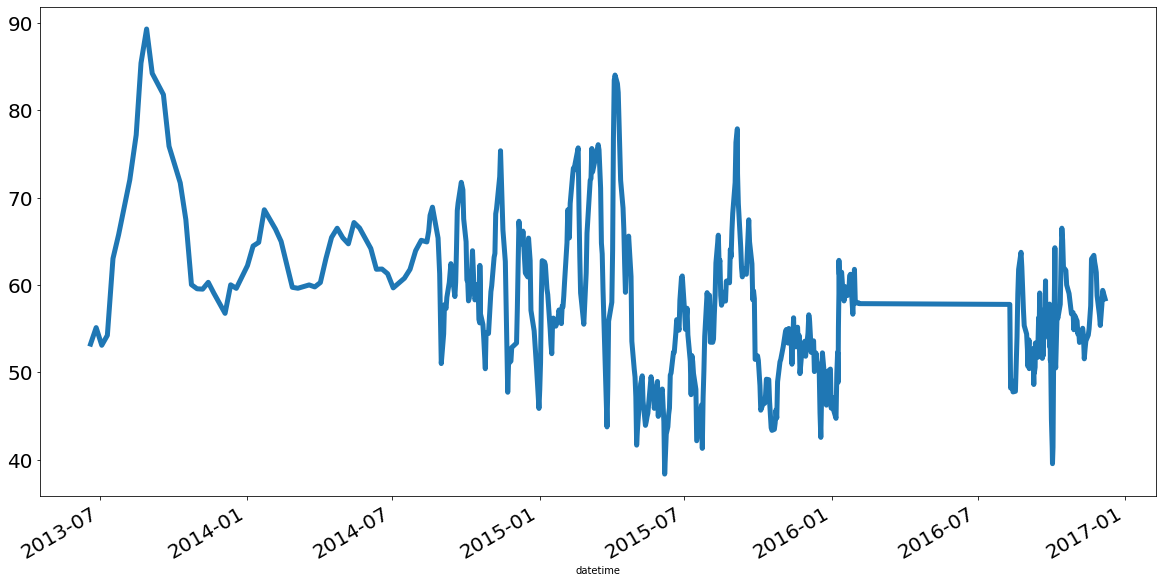

In [100]:
#Identifying Trends in Time Series
data['label'].rolling(6).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('datetime', fontsize=10);
plt.show

# check stationarity using the following:


*   ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

*   Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.


*   Augmented Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.









# # ACF and PACF plots
# it look like stationary effect is also available
If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
This data is non-stationary as a high number of previous observations are correlated with future values. but at the end it drops down constantly. 
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

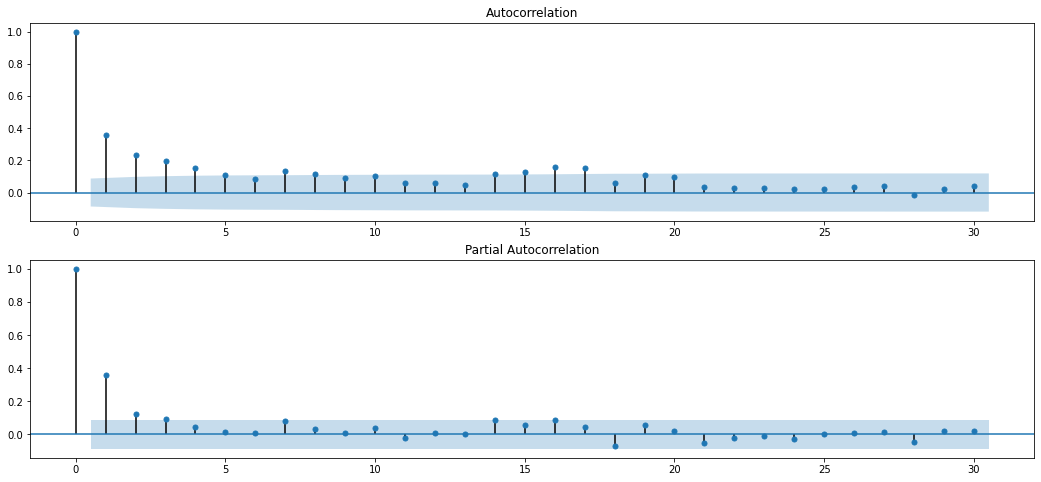

In [101]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(data.label, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(data.label, ax=pyplot.gca(), lags = 30)
pyplot.show()


#Rolling Statistics
We observe that the rolling mean and Standard deviation are not constant with respect to time except the period(2016-2017). The time series is hence not stationary

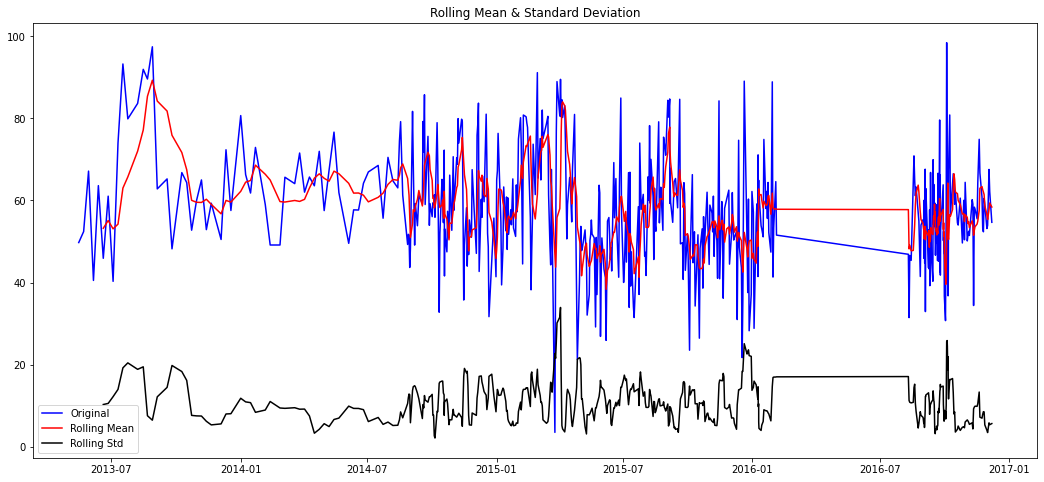

In [102]:
#Determing rolling statistics
rolmean=data.rolling(6).mean()
rolstd=data.rolling(6).std()
#Plot rolling statistics:
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Transforming to Stationary Time Series


1.   The data is non stationary because of trend(varying mean over time) and seasonality(variations at specific time-frames).
2.   Transformations
We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. 





In [103]:
# log scale transformation

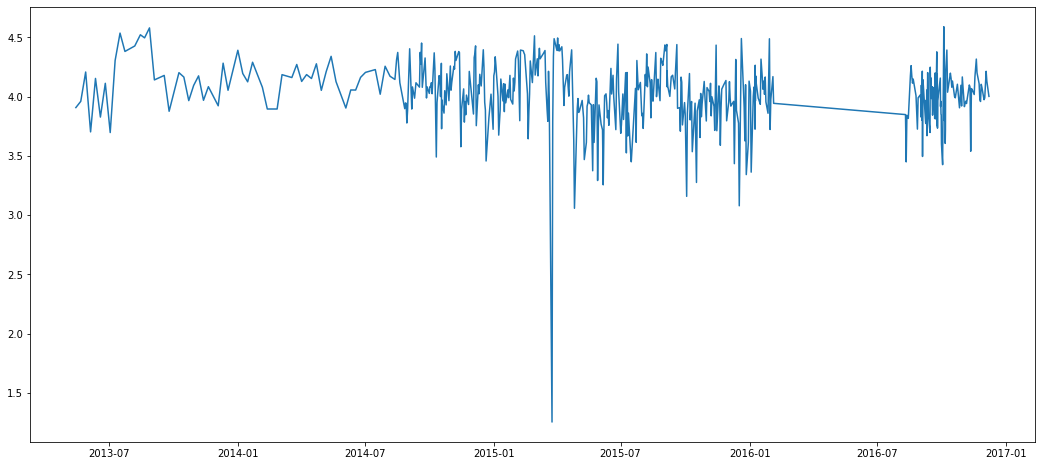

In [104]:
ts_log = np.log(data)
plt.plot(ts_log)

# Differencing
In this technique, we take the difference of the observation at a particular instant with that at the previous instant.


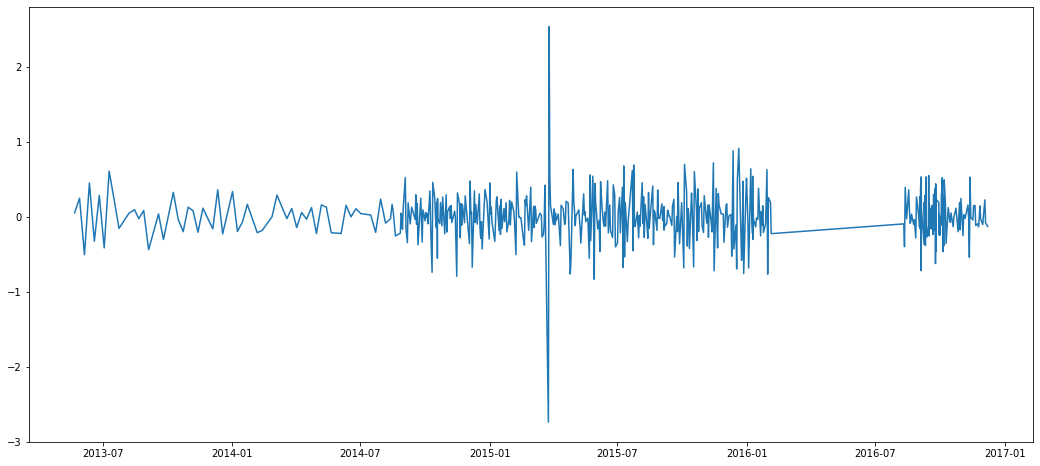

In [105]:
ts_log_diff = ts_log.label - ts_log.label.shift()
plt.plot(ts_log_diff)

#Perform Dickey-Fuller test: To know about data is stationary or not
the results shows that data is not stationary.

In [106]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.label, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -9.115266e+00
p-value                        3.315531e-15
#Lags Used                     2.000000e+00
Number of Observations Used    5.040000e+02
Critical Value (1%)           -3.443392e+00
Critical Value (5%)           -2.867292e+00
Critical Value (10%)          -2.569833e+00
dtype: float64


# ARIMA MODEL
In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [107]:
!pip install pmdarima

In [108]:
import pmdarima as pm
#by default auto arima uses AIC,the lower aic the model is good
model = pm.auto_arima(monthly['label'],
                      m = 6, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[6]             : AIC=674.800, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[6]             : AIC=672.680, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[6]             : AIC=658.645, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[6]             : AIC=663.251, Time=0.01 sec
 ARIMA(1,2,0)(2,0,0)[6]             : AIC=659.315, Time=0.13 sec
 ARIMA(1,2,0)(1,0,1)[6]             : AIC=659.750, Time=0.13 sec
 ARIMA(1,2,0)(0,0,1)[6]             : AIC=661.705, Time=0.08 sec
 ARIMA(1,2,0)(2,0,1)[6]             : AIC=660.937, Time=0.28 sec
 ARIMA(0,2,0)(1,0,0)[6]             : AIC=674.183, Time=0.04 sec
 ARIMA(2,2,0)(1,0,0)[6]             : AIC=658.227, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[6]             : AIC=661.744, Time=0.01 sec
 ARIMA(2,2,0)(2,0,0)[6]             : AIC=659.393, Time=0.15 sec
 ARIMA(2,2,0)(1,0,1)[6]             : AIC=659.573, Time=0.15 sec
 ARIMA(2,2,0)(0,0,1)[6]             : AIC=660.752, 

The auto arima choose SARIMAX model for this dataset. the best parameter of p,d,q is 5,2,0 and AIC is 650 that is lowest

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   44
Model:             SARIMAX(5, 2, 0)x(1, 0, 0, 6)   Log Likelihood                -318.364
Date:                           Wed, 26 Aug 2020   AIC                            650.728
Time:                                   22:45:53   BIC                            662.892
Sample:                                        0   HQIC                           655.187
                                            - 44                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0463      0.106     -9.902      0.000      -1.253      -0.839
ar.L2         -0.9091      0.199     -4.573      0.000      -1.299      -0.519
ar.L3         -0.9431      0.286     -3.294      0.001      -1.504      -0.382
ar.L4         -0.7189      0.289     -2.492      0.013      -1.284      -0.153
ar.L5         -0.5699      0.223     -2.554      0.011      -1.007      -0.133
ar.S.L6       -0.7762      0.248     -3.128      0.002      -1.262      -0.290
sigma2      1.997e+05   3.69e+04      5.414      0.000    1.27e+05    2.72e+05
===================================================================================
Ljung-Box (Q):                       20.72   Jarque-Bera (JB):                75.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              37.34   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train and Test
For test dataset, i have choosed the period from 2016 onward as in this there has also shut down period.

In [110]:
train = monthly[(monthly.index.get_level_values(0)>='2013-05-01') & (monthly.index.get_level_values(0)<='2015-12-31')]
test = monthly[(monthly.index.get_level_values(0)>'2015-12-31')]

In [111]:
test

,label
datetime,
2016-01-31,1488.012305
2016-02-29,116.150000
2016-03-31,0.000000
2016-04-30,0.000000
2016-05-31,0.000000
2016-06-30,0.000000
2016-07-31,0.000000
2016-08-31,758.579994
2016-09-30,2716.620001


In [112]:
print(train.shape)
print(test.shape)

(32, 1)
(12, 1)


In [113]:

model.fit(train['label'])

ARIMA(maxiter=50, method='lbfgs', order=(5, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 0, 6),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [114]:
forecast = model.predict(n_periods=12,return_conf_int=True)
#return_conf_int is True means it will print the confidance interval too
#in forecasting model we always takes the confidence interval into the account

In [115]:
forecast

(array([1054.50565438, 1080.276689  ,  924.00359734,  887.47070675,
         843.27996793,  884.29551156,  916.53502041,  940.4879172 ,
         876.72055293,  773.83668346,  792.14532705,  808.0303887 ]),
 array([[  668.01698612,  1440.99432264],
        [  512.69105761,  1647.86232039],
        [  230.10890579,  1617.89828889],
        [   63.48051624,  1711.46089726],
        [ -106.89163188,  1793.45156773],
        [ -244.48076465,  2013.07178777],
        [ -387.09344834,  2220.16348916],
        [ -521.52951409,  2402.50534849],
        [ -738.93864127,  2492.37974713],
        [ -999.88080267,  2547.55416959],
        [-1152.98372669,  2737.27438078],
        [-1326.99728515,  2943.05806256]]))

In [116]:
forecast_df = pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])

In [117]:
forecast_df

,Prediction
datetime,
2016-01-31,1054.505654
2016-02-29,1080.276689
2016-03-31,924.003597
2016-04-30,887.470707
2016-05-31,843.279968
2016-06-30,884.295512
2016-07-31,916.535020
2016-08-31,940.487917
2016-09-30,876.720553


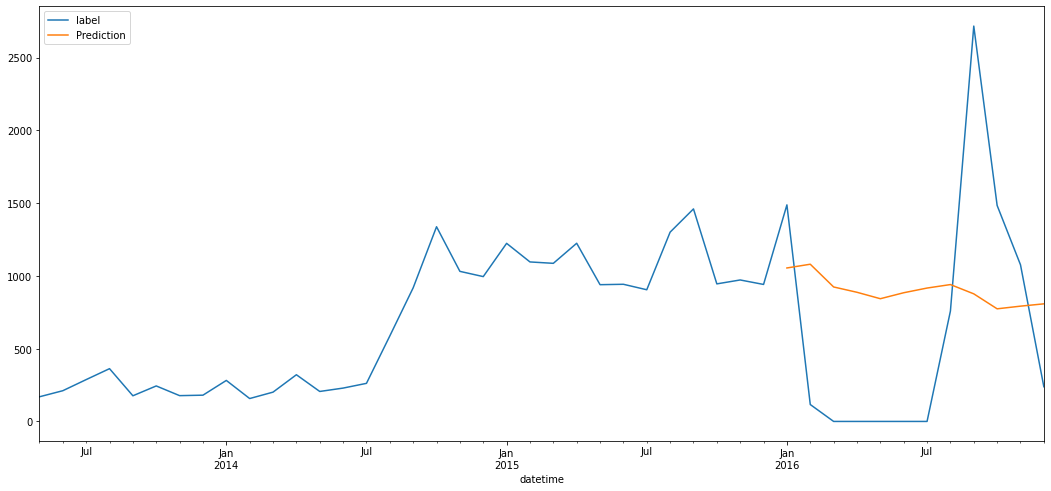

In [118]:
pd.concat([monthly['label'],forecast_df],axis=1).plot()

In [119]:
data_copy.head()

,label
datetime,
2013-05-15 06:30:00,49.744664
2013-05-22 06:30:00,52.428068
2013-05-29 06:30:00,67.154640
2013-06-05 06:30:00,40.521581
2013-06-12 06:30:00,63.614351


Dealing shut down period as holiday parameter with facebook prophet

In [120]:
from fbprophet import Prophet

In [121]:
df = data_copy.reset_index()[['datetime','label']].rename({'datetime':'ds','label':'y'}, axis='columns')

In [122]:
date_rng = pd.date_range(start='2016-01-01', end='2016-07-31', freq='D')
date_rng

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-07-22', '2016-07-23', '2016-07-24', '2016-07-25',
               '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29',
               '2016-07-30', '2016-07-31'],
              dtype='datetime64[ns]', length=213, freq='D')

In [123]:
holiday_sale = pd.DataFrame({
  'holiday': 'dec_jan_sale',
  'ds': date_rng,
  'lower_window': 0,
  'upper_window': 1,
})

In [124]:
holiday_sale

,holiday,ds,lower_window,upper_window
0,dec_jan_sale,2016-01-01,0,1
1,dec_jan_sale,2016-01-02,0,1
2,dec_jan_sale,2016-01-03,0,1
3,dec_jan_sale,2016-01-04,0,1
4,dec_jan_sale,2016-01-05,0,1
...,...,...,...,...
208,dec_jan_sale,2016-07-27,0,1
209,dec_jan_sale,2016-07-28,0,1
210,dec_jan_sale,2016-07-29,0,1
211,dec_jan_sale,2016-07-30,0,1


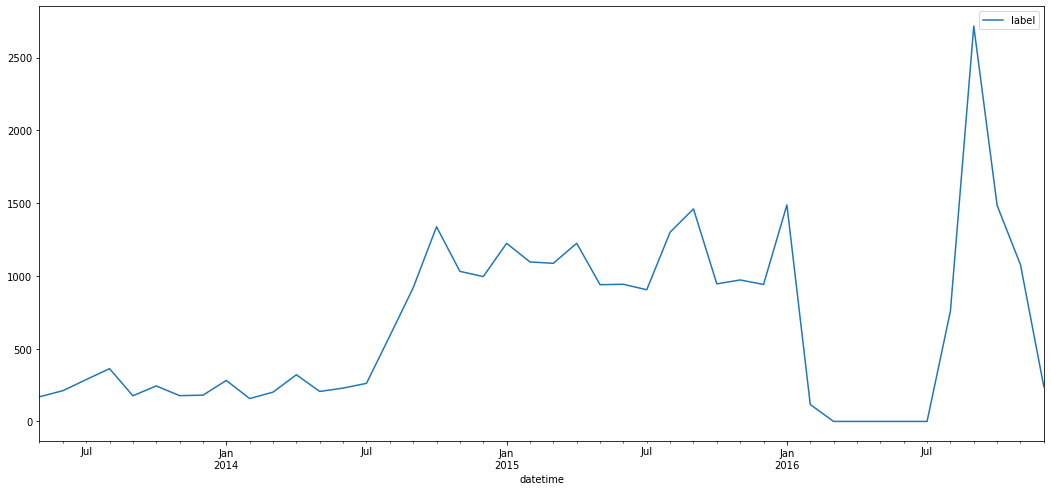

In [125]:
monthly_df=data_copy.resample('M').sum()
monthly_df.plot()

In [126]:

train_df = df[(df['ds']>='2013-05-01') & (df['ds']<='2016-07-31')]
test_df = df[(df['ds']>'2016-07-31')]


In [127]:
m2 = Prophet(holidays=holiday_sale,seasonality_mode='multiplicative', interval_width=0.95)

In [128]:
m2.fit(train_df)


In [144]:
future = m2.make_future_dataframe(periods=12,freq='M')
future.head()


,ds
0,2013-05-15 06:30:00
1,2013-05-22 06:30:00
2,2013-05-29 06:30:00
3,2013-06-05 06:30:00
4,2013-06-12 06:30:00


In [145]:
forecast = m2.predict(future)

In [146]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
400,2016-09-30 06:30:00,48.794555,22.722659,72.731101
401,2016-10-31 06:30:00,52.878033,29.008785,78.179988
402,2016-11-30 06:30:00,46.180545,20.768521,71.139307
403,2016-12-31 06:30:00,44.400863,20.473040,68.907858
404,2017-01-31 06:30:00,45.997511,24.314250,70.132110


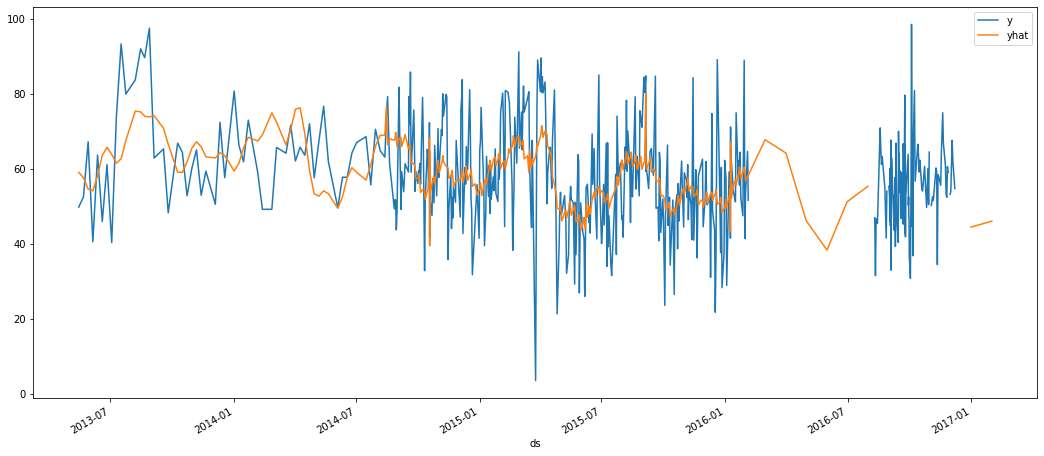

In [142]:
pd.concat([df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()
#pd.concat([monthly_df['label'],forecast.yhat_upper],axis=1).plot()

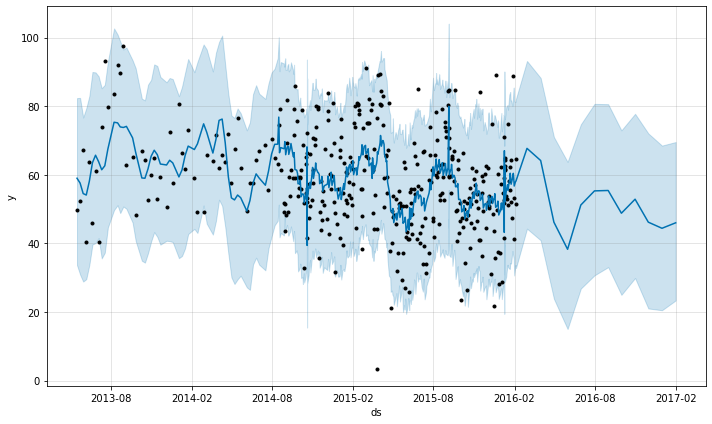

In [133]:
fig2 = m2.plot(forecast)

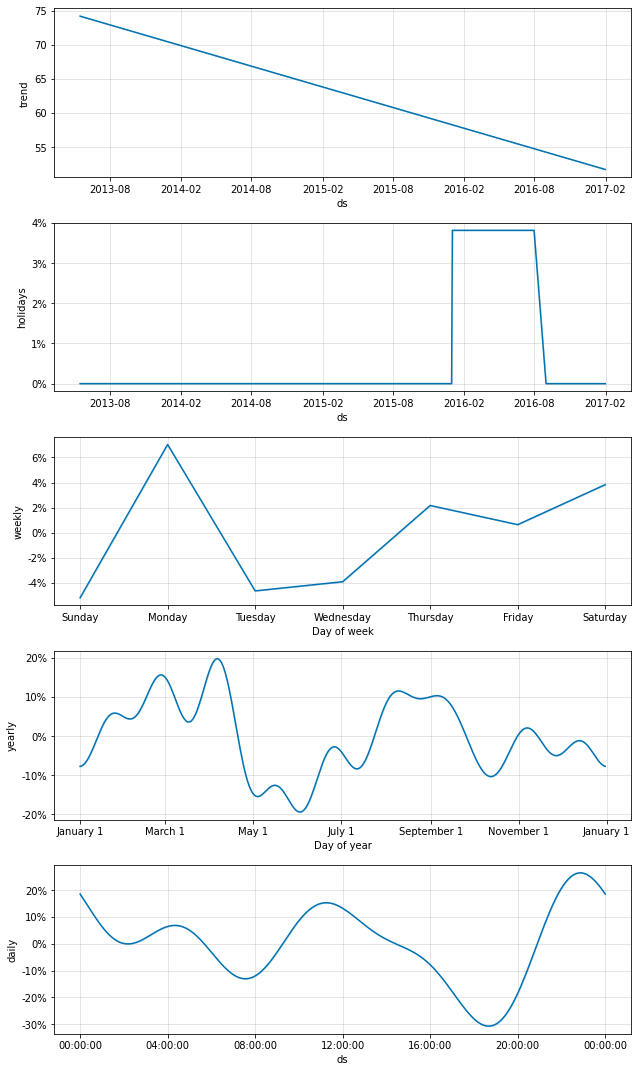

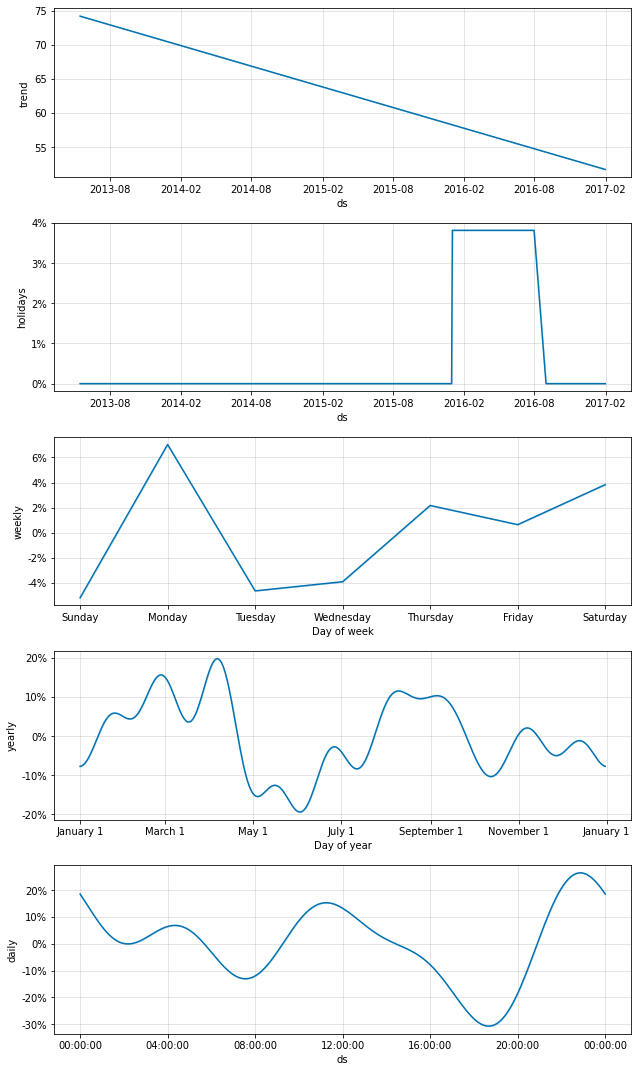

In [134]:

m2.plot_components(forecast)